## Importing Dependencies



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import uniform, loguniform, randint, truncnorm

# Data import
from sklearn.datasets import load_iris

#Modelling libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC

#Evaluation libraries
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix, classification_report

#Tuning libraries
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

## Importing Data

In [ ]:
pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
wine_quality = fetch_ucirepo(id=186)

# metadata
print(wine_quality.metadata)

# variable information
print(wine_quality.variables)


{'uci_id': 186, 'name': 'Wine Quality', 'repository_url': 'https://archive.ics.uci.edu/dataset/186/wine+quality', 'data_url': 'https://archive.ics.uci.edu/static/public/186/data.csv', 'abstract': 'Two datasets are included, related to red and white vinho verde wine samples, from the north of Portugal. The goal is to model wine quality based on physicochemical tests (see [Cortez et al., 2009], http://www3.dsi.uminho.pt/pcortez/wine/).', 'area': 'Business', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate'], 'num_instances': 4898, 'num_features': 11, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['quality'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2009, 'last_updated': 'Wed Nov 15 2023', 'dataset_doi': '10.24432/C56S3T', 'creators': ['Paulo Cortez', 'A. Cerdeira', 'F. Almeida', 'T. Matos', 'J. Reis'], 'intro_paper': {'title': 'Modeling wine preferences by data mining from physicoc

In [ ]:
df = wine_quality.data.original

In [ ]:
white_wine = df[df['color']=='white']

In [ ]:
white_wine.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
1599,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white
1600,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white
1601,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white
1602,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white
1603,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white


<Axes: >

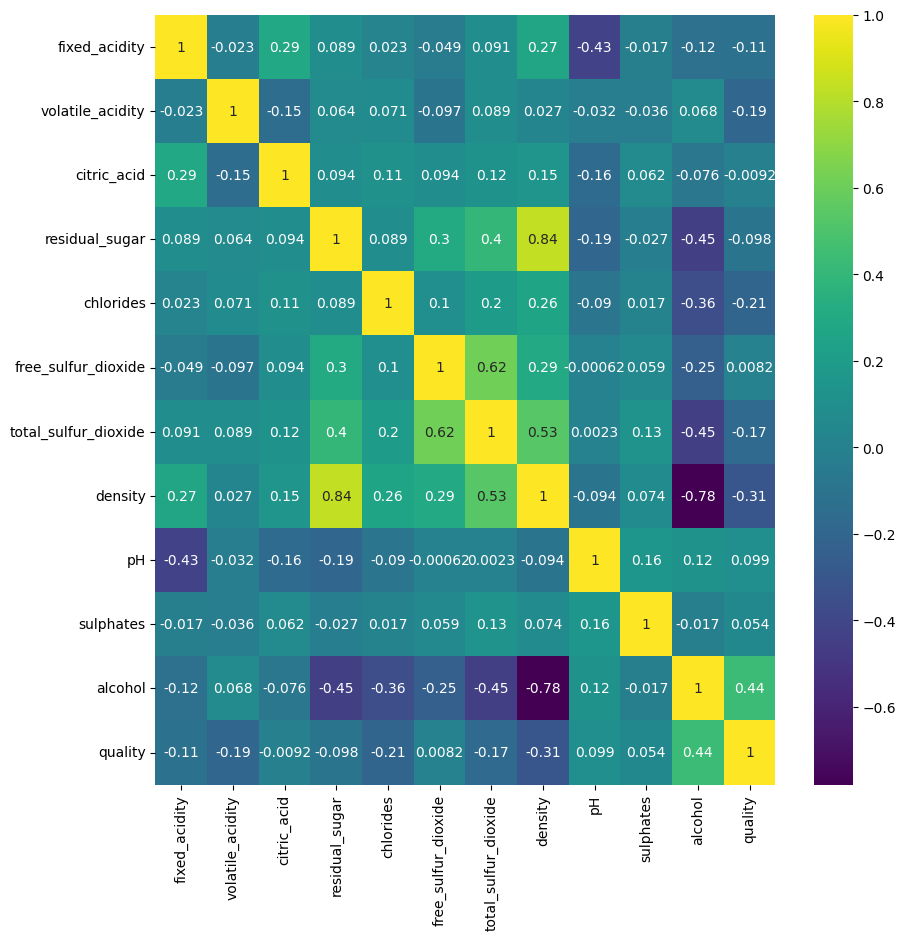

In [ ]:
fig = plt.figure(figsize=(10,10))
sns.heatmap(white_wine.corr(numeric_only=True), annot=True, cmap='viridis')

In [ ]:
#Changing quality variable to categorical
bins = [2, 6.5, 8]  # Custom bin edges
white_wine['quality'] = pd.cut(white_wine['quality'], bins=bins, labels=['bad', 'good'])

<ipython-input-8-6e6fb4e35c34>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  white_wine['quality'] = pd.cut(white_wine['quality'], bins=bins, labels=['bad', 'good'])


In [ ]:
white_wine

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
1599,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,bad,white
1600,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,bad,white
1601,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,bad,white
1602,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,bad,white
1603,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,bad,white
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,bad,white
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,bad,white
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,bad,white
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,good,white


In [ ]:
white_wine['quality'].value_counts()

quality
bad     3838
good    1055
Name: count, dtype: int64

In [ ]:
#Encoding the target column

le = LabelEncoder()
white_wine['quality'] = le.fit_transform(white_wine['quality'])

<ipython-input-11-e8a18cca0f6f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  white_wine['quality'] = le.fit_transform(white_wine['quality'])


In [ ]:
white_wine.drop('color', axis =1).sort_values(by='volatile_acidity')

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
3079,7.2,0.080,0.49,1.3,0.050,18.0,148.0,0.99450,3.46,0.44,10.2,0
3074,7.2,0.080,0.49,1.3,0.050,18.0,148.0,0.99450,3.46,0.44,10.2,0
2572,6.5,0.080,0.33,1.9,0.028,23.0,93.0,0.99100,3.34,0.70,12.0,1
2567,6.5,0.080,0.33,1.9,0.028,23.0,93.0,0.99100,3.34,0.70,12.0,1
5251,6.6,0.085,0.33,1.4,0.036,17.0,109.0,0.99306,3.27,0.61,9.5,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3455,10.0,0.910,0.42,1.6,0.056,34.0,181.0,0.99680,3.11,0.46,10.0,0
3753,9.8,0.930,0.45,8.6,0.052,34.0,187.0,0.99940,3.12,0.59,10.2,0
4380,7.8,0.965,0.60,65.8,0.074,8.0,160.0,1.03898,3.39,0.69,11.7,0
3550,9.9,1.005,0.46,1.4,0.046,34.0,185.0,0.99660,3.02,0.49,10.2,0


In [ ]:
X= white_wine.drop(['color', 'quality'], axis =1)
y= white_wine['quality']

In [ ]:
white_wine.iloc[:,:-2]

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
1599,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8
1600,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5
1601,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1
1602,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
1603,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8


In [ ]:
X

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
1599,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8
1600,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5
1601,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1
1602,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
1603,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8


In [ ]:
y

1599    0
1600    0
1601    0
1602    0
1603    0
       ..
6492    0
6493    0
6494    0
6495    1
6496    0
Name: quality, Length: 4898, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=101)

In [ ]:
sc= StandardScaler()
X_train= sc.fit_transform(X_train)

In [ ]:
# from sklearn.ensemble import RandomForestClassifier
# rf = RandomForestClassifier()
svc = SVC()

In [ ]:
import time
start_time = time.time()

#svc.fit(X_train, y_train)
svc.fit(X_train, y_train)

# Summarize results
print("Execution time: " + str((time.time() - start_time)) + ' s')

Execution time: 0.40480828285217285 s


In [ ]:
y_pred = svc.predict(sc.transform(X_test))

In [ ]:
svc.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [ ]:
print(classification_report(y_test, y_pred))
print('Confusion matrix')
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90       785
           1       0.65      0.31      0.42       195

    accuracy                           0.83       980
   macro avg       0.75      0.64      0.66       980
weighted avg       0.81      0.83      0.80       980

Confusion matrix
[[752  33]
 [134  61]]


## With grid search

In [ ]:
param_grid = {'C':[0.1,1,2,5],
              'gamma':[1,0.8,0.5,0.2,0.1],
              'kernel':['rbf', 'sigmoid'],
              'degree':[1,2,3],
              'class_weight':[None, 'balanced']}

In [ ]:
# param_grid = {'criterion': ['gini', 'entropy', 'log_loss'],
#  'max_depth': range(5, 101, 5),
#  'n_estimators': [1, 20, 50, 100, 150]}

In [ ]:
grid_search = GridSearchCV(svc, param_grid, cv=3, scoring='accuracy', error_score='raise', refit=True, verbose=3)

In [ ]:
# import sklearn
# sklearn.metrics.get_scorer_names()

In [ ]:
import time
start_time = time.time()
grid_search.fit(X_train, y_train)

# Summarize results
print(f"Best score: {grid_search.best_score_} using {grid_search.best_params_}")
print("Execution time: " + str((time.time() - start_time)) + ' s')

Fitting 3 folds for each of 240 candidates, totalling 720 fits
[CV 1/3] END C=0.1, class_weight=None, degree=1, gamma=1, kernel=rbf;, score=0.779 total time=   0.7s
[CV 2/3] END C=0.1, class_weight=None, degree=1, gamma=1, kernel=rbf;, score=0.781 total time=   0.5s
[CV 3/3] END C=0.1, class_weight=None, degree=1, gamma=1, kernel=rbf;, score=0.779 total time=   0.7s
[CV 1/3] END C=0.1, class_weight=None, degree=1, gamma=1, kernel=sigmoid;, score=0.719 total time=   0.5s
[CV 2/3] END C=0.1, class_weight=None, degree=1, gamma=1, kernel=sigmoid;, score=0.721 total time=   0.6s
[CV 3/3] END C=0.1, class_weight=None, degree=1, gamma=1, kernel=sigmoid;, score=0.698 total time=   0.6s
[CV 1/3] END C=0.1, class_weight=None, degree=1, gamma=0.8, kernel=rbf;, score=0.779 total time=   1.1s
[CV 2/3] END C=0.1, class_weight=None, degree=1, gamma=0.8, kernel=rbf;, score=0.781 total time=   0.9s
[CV 3/3] END C=0.1, class_weight=None, degree=1, gamma=0.8, kernel=rbf;, score=0.781 total time=   1.0s
[

KeyboardInterrupt: 

In [ ]:
print(f"Best score: {grid_search.best_score_} using {grid_search.best_params_}")
print("Execution time: " + str((time.time() - start_time)) + ' s')

In [ ]:
grid_search.best_score_

In [ ]:
y_grid = grid_search.predict(sc.transform(X_test))

In [ ]:
print('Classification Report')
print(classification_report(y_test, y_grid))
print('Confusion matrix')
print(confusion_matrix(y_test, y_grid))

## With Randomized Search

In [ ]:
param_dist = {'C':uniform(0,5),
              'gamma':[1,0.9,0.8,0.5,0.2,0.1],
              'kernel':['rbf', 'sigmoid', 'poly'],
              'degree':[1,2,3],
              'class_weight':[None, 'balanced']}

# param_dist = {'criterion': ['gini', 'entropy', 'log_loss'],
#  'max_depth': randint(1,100),
#  'n_estimators': randint(low=1, high=1000),  # Randomly sample between 10 and 100 (inclusive)
#  'max_features': randint(1,10),  # Truncated normal distribution
#               'min_samples_split': [2, 5, 10,50]
# }


In [ ]:
random_search = RandomizedSearchCV(svc, param_dist, cv=3, n_iter=20, scoring='accuracy')

In [ ]:
start_time = time.time()
random_search.fit(X_train, y_train)

# Summarize results
print(f"Best score: {random_search.best_score_} using {random_search.best_params_}")
print("Execution time: " + str((time.time() - start_time)) + ' s')

# Best: 0.848392 using {'C': 3.6159949729228202, 'class_weight': None, 'degree': 1, 'gamma': 0.8, 'kernel': 'rbf'}
# Execution time: 2291.1321642398834 ms


In [ ]:
random_search.best_score_

In [ ]:
y_rand = random_search.predict(sc.transform(X_test))

In [ ]:
print('Classification Report')
print(classification_report(y_test, y_rand))
print('Confusion matrix')
print(confusion_matrix(y_test, y_rand))

## With Bayesian Optimization

In [ ]:
pip install scikit-optimize

In [ ]:
from skopt import BayesSearchCV
from sklearn.model_selection import cross_val_score

# Define your optimization function (e.g., cross-validated accuracy)
# def objective(parameters):
#     model = SVC(**parameters)
#     scores = cross_val_score(model, X_train, y_train, cv=5, scoring = 'accuracy')
#     return scores.mean()  # Minimize negative accuracy

# Define the search space. This is similar to the parameter grid
search_space = {'C':[0.1,1,2,5],
              'gamma':[1,0.8,0.5,0.2,0.1],
              'kernel':['rbf', 'sigmoid'],
              'degree':[1,2,3],
              'class_weight':[None, 'balanced']}

# Initialize the optimizer
bayes_optimizer = BayesSearchCV(SVC(), search_space, n_iter=20, cv=5, n_jobs=-1, scoring = 'accuracy')


In [ ]:
import time
start_time = time.time()

# Fit the optimizer to your data
bayes_optimizer.fit(X_train, y_train)


BayesSearchCV(cv=5, estimator=SVC(), n_iter=20, n_jobs=-1, scoring='accuracy',
              search_spaces={'C': [0.1, 1, 2, 5],
                             'class_weight': [None, 'balanced'],
                             'degree': [1, 2, 3],
                             'gamma': [1, 0.8, 0.5, 0.2, 0.1],
                             'kernel': ['rbf', 'sigmoid']})

In [ ]:
# Summarize results
print(f"Best score: {bayes_optimizer.best_score_} using {bayes_optimizer.best_params_}")
print("Execution time: " + str((time.time() - start_time)) + ' s')

Best score: 0.8614101962624131 using OrderedDict([('C', 5), ('class_weight', None), ('degree', 1), ('gamma', 1), ('kernel', 'rbf')])
Execution time: 83.86682415008545 s


In [ ]:
y_bayes = bayes_optimizer.predict(sc.transform(X_test))

In [ ]:
print('Classification Report')
print(classification_report(y_test, y_bayes))
print('Confusion matrix')
print(confusion_matrix(y_test, y_bayes))

Classification Report
              precision    recall  f1-score   support

           0       0.91      0.97      0.94       785
           1       0.82      0.62      0.70       195

    accuracy                           0.90       980
   macro avg       0.87      0.79      0.82       980
weighted avg       0.89      0.90      0.89       980

Confusion matrix
[[759  26]
 [ 75 120]]
